# Simulation and Noise Models

In [1]:
%load_ext autoreload
%autoreload 2

We can set up a noise model, following the [Qiskit textbook](https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html#Correcting-errors-in-qubits). We define our noise model to have equal chances of X and Z:

In [2]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import pauli_error, depolarizing_error

def get_noise_model(p_err):

    error_gate1 = pauli_error([("X", p_err / 2), ("Z", p_err / 2), ("I", 1 - p_err)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, "id")
    return noise_model

We set up a test harness to run through some examples:

In [3]:
from qtcodes import TopologicalBenchmark, TopologicalAnalysis
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import pauli_error, depolarizing_error
from qtcodes import RotatedDecoder
from qtcodes import XXZZQubit
from qiskit_aer import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from tqdm import tqdm

import multiprocessing as mp

d:\anaconda\envs\quantum-RB\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


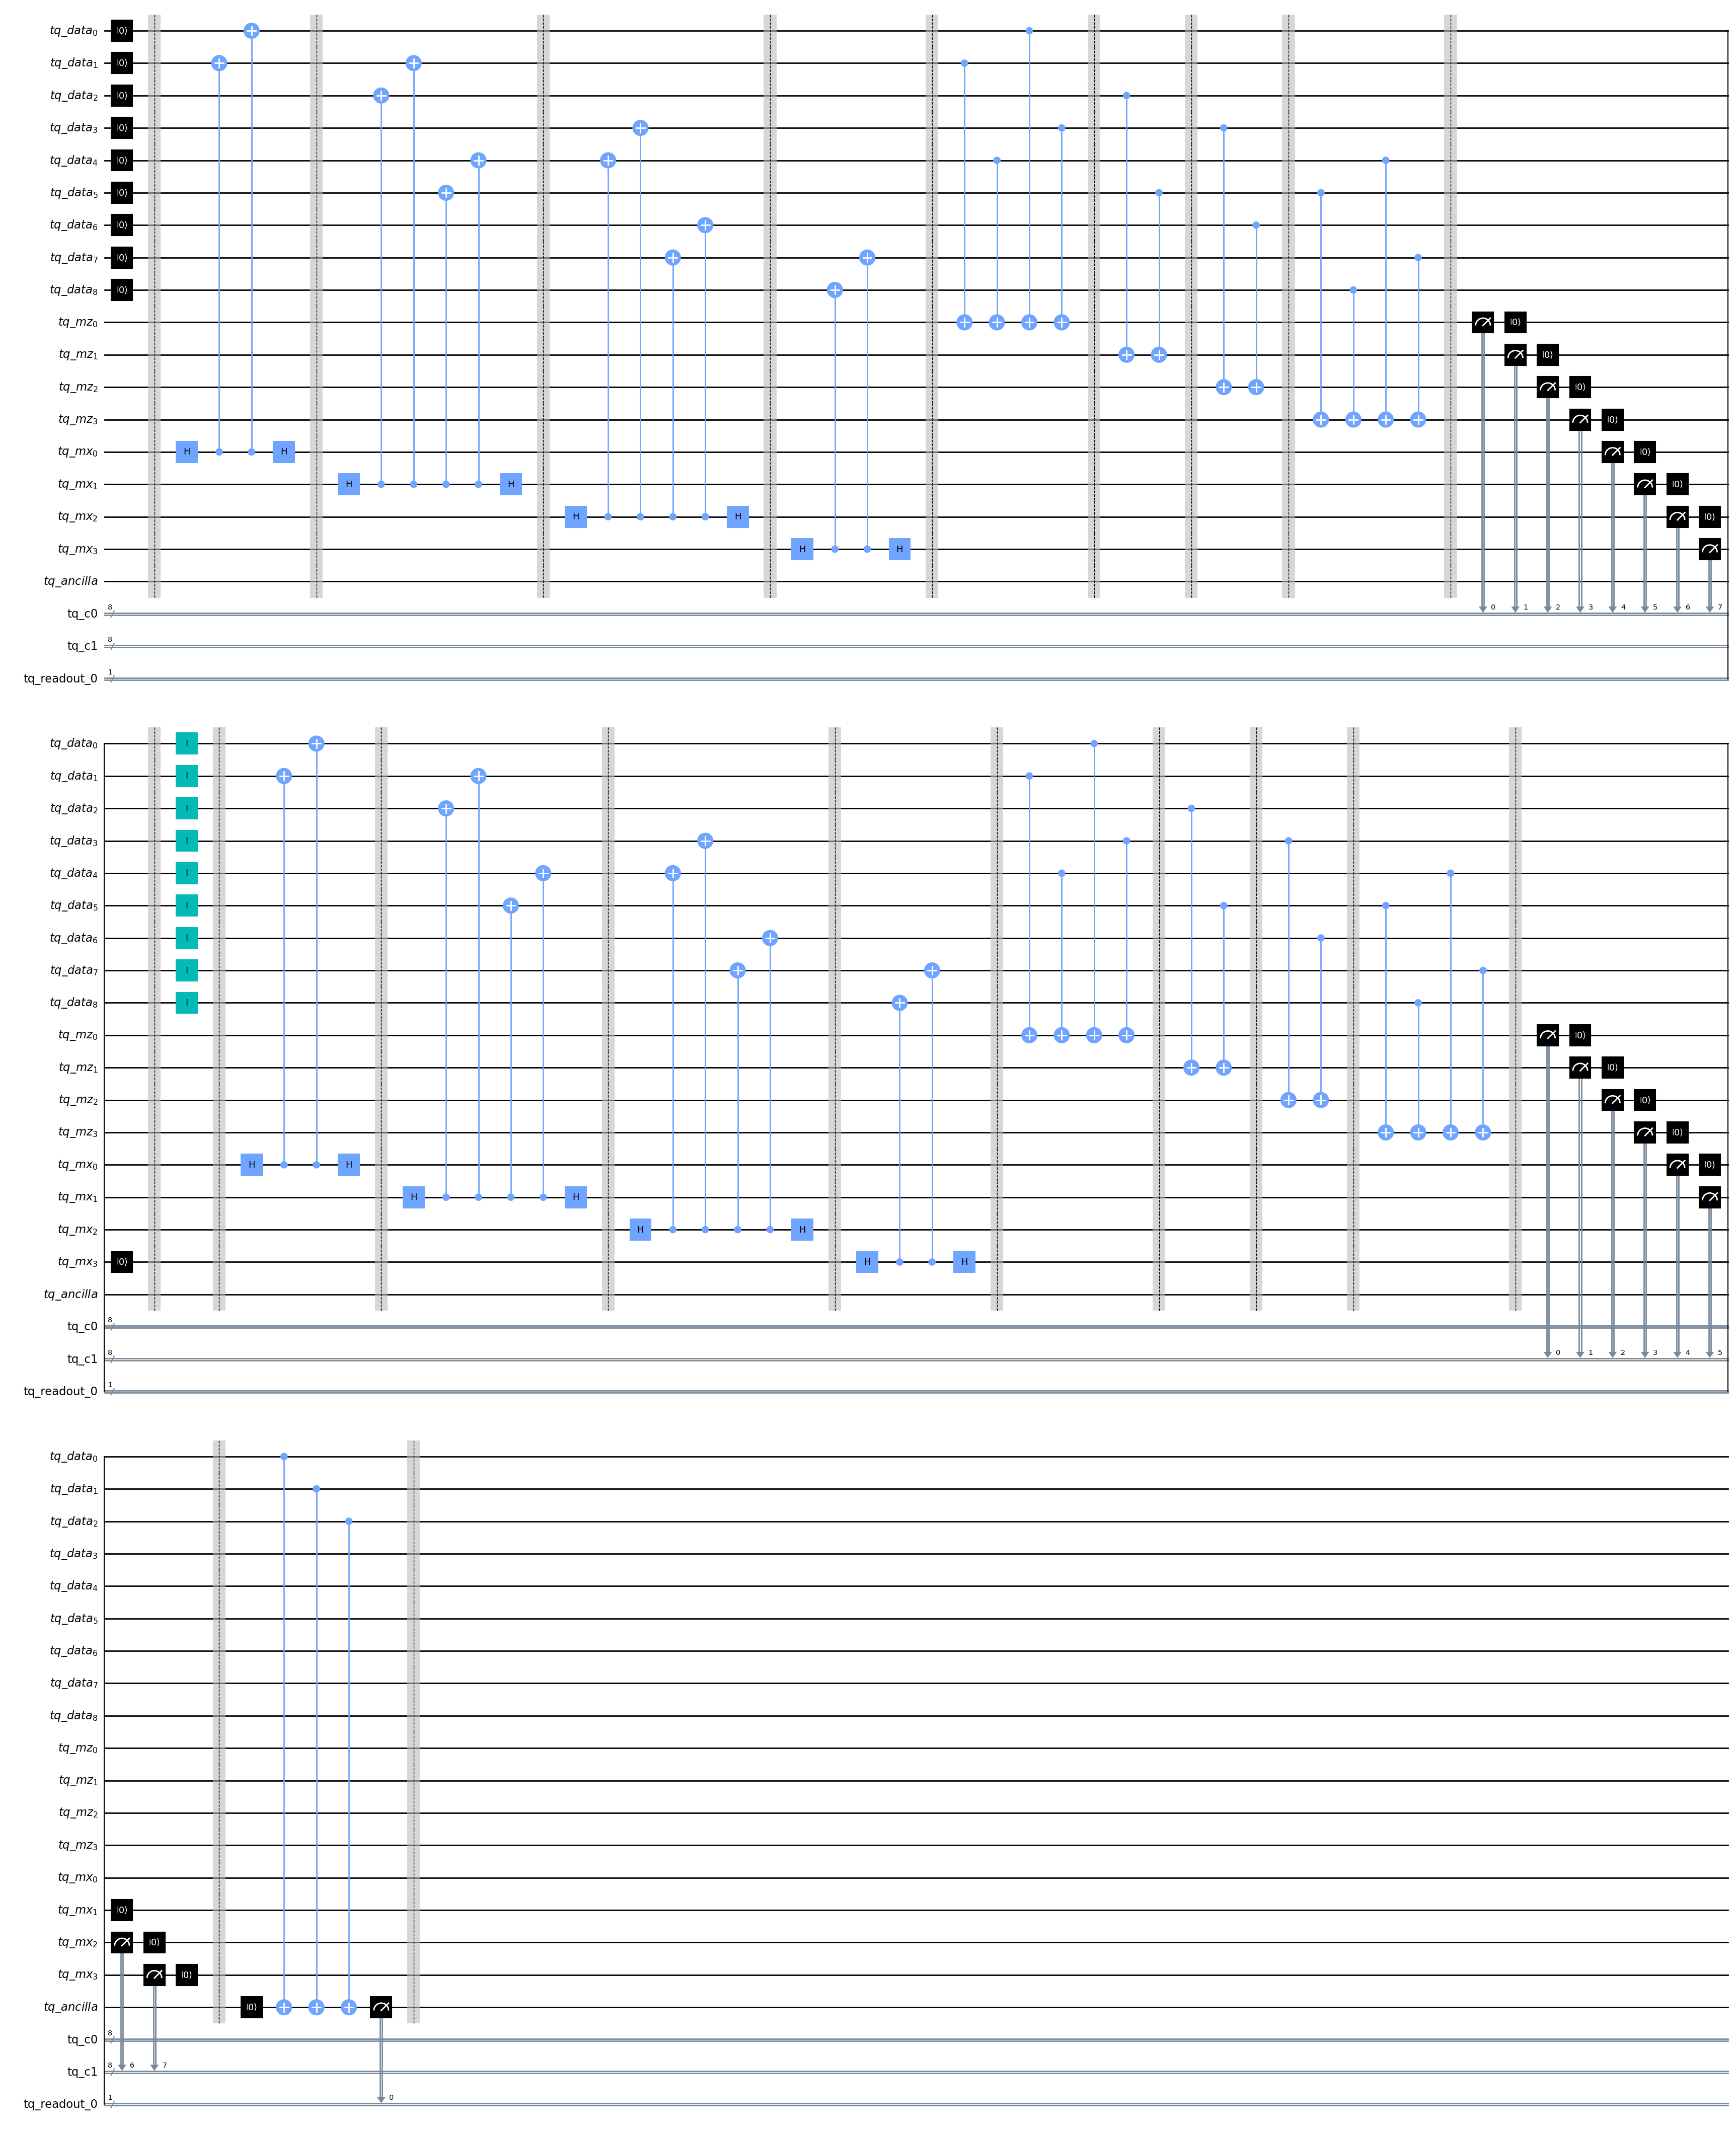

In [4]:
d = 3
T = 2

qubit = XXZZQubit({'d':d,"T":T})
qubit.reset_z()
qubit.stabilize()
qubit.id_data()
qubit.stabilize()
qubit.readout_z()
qubit.draw(output='mpl', fold=50)

In [6]:
tool = TopologicalBenchmark(
    decoder=RotatedDecoder({"d":d, "T":T}),
    circ=qubit.circ,
    noise_model_func=get_noise_model,
    correct_logical_value = 0
)

print("\nSIMULATE: (d={},T={})\n".format(tool.decoder.params["d"], tool.decoder.params["T"]))
# physical_error_rates = [0.04,0.07, 0.10,0.13,0.16]
# tool.sweep(physical_error_rates=physical_error_rates)
# print("Done!")
tool.single(physical_error_rate = 0.04)


SIMULATE: (d=(3, 3),T=2)

syndromes: {'X': [], 'Z': []}, logical_qubit_value:0
syndromes: {'X': [(0.0, 0.5, 1.5)], 'Z': [(0.0, 1.5, 1.5)]}, logical_qubit_value:0
source:(-1, 2.5, 0.5), target: (0.0, 1.5, 1.5)
syndromes: {'X': [], 'Z': [(0.0, 0.5, 0.5)]}, logical_qubit_value:1
source:(-1, -0.5, -0.5), target: (0.0, 0.5, 0.5)
syndromes: {'X': [], 'Z': [(0.0, 0.5, 0.5)]}, logical_qubit_value:1
source:(-1, -0.5, -0.5), target: (0.0, 0.5, 0.5)
syndromes: {'X': [], 'Z': [(0.0, 1.5, 1.5)]}, logical_qubit_value:0
source:(-1, 2.5, 0.5), target: (0.0, 1.5, 1.5)
syndromes: {'X': [], 'Z': []}, logical_qubit_value:0
syndromes: {'X': [], 'Z': []}, logical_qubit_value:0
syndromes: {'X': [], 'Z': []}, logical_qubit_value:0
syndromes: {'X': [], 'Z': []}, logical_qubit_value:0
syndromes: {'X': [], 'Z': [(0.0, 1.5, 1.5)]}, logical_qubit_value:0
source:(-1, 2.5, 0.5), target: (0.0, 1.5, 1.5)
syndromes: {'X': [(0.0, 0.5, 1.5)], 'Z': [(0.0, 0.5, 0.5)]}, logical_qubit_value:1
source:(-1, -0.5, -0.5), target

0.00927734375

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# analysis = TopologicalAnalysis()
# for log_plot in [True, False]:
#     fig = plt.figure(figsize=(3.5, 2.5), dpi=200)
#     ax = fig.subplots()
#     analysis.params["d"] = int(tool.decoder.params["d"][0])
#     analysis.params["T"] = int(tool.decoder.params["T"])
#     analysis.data["physical_error_rates"] = tool.data["physical_error_rates"]
#     analysis.data["logical_error_rates"] = tool.data["logical_error_rates"]
#     analysis.plot(
#         fig=fig,
#         ax=ax,
#         label="d={},T={}".format(tool.decoder.params["d"], tool.decoder.params["T"]),
#         log=log_plot,
#     )
#     plt.plot(
#         tool.data["physical_error_rates"],
#         tool.data["physical_error_rates"],
#         "--",
#         label="breakeven",
#     )
#     plt.legend(loc="lower right", prop={"size": 6})
#     ax.set_xlabel("Physical Error Rate", size=10)
#     ax.set_ylabel("Logical Error Rate", size=10)
#     ax.set_title("Surface Code Performance", size=10)
#     fig.tight_layout()
#     plt.show()

So, we see the d=3, T=1 surface code does quite well for this particular error model!